# Handwritten Digit Recognition using MLP (scikit-learn)

This notebook demonstrates how to use a Multi-Layer Perceptron (MLP) classifier from `scikit-learn` to recognize handwritten digits from the MNIST dataset.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [45]:
# Load the MNIST dataset from OpenML
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")


Loading MNIST dataset...
Dataset shape: (70000, 784), Labels shape: (70000,)


In [46]:
#fetch the attribute located in entry 50
fiftyInput = X[50]
print(fiftyInput)
#len(fiftyInput)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  12  56 140 126
 175 200  96   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  35 166 238 254 246 242 253 246 254  67   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 182 146 127
  70  30  45  36 215 175   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246  14   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  55 251 169   1   0   0   0   

In [47]:
#fetch the corresponding class associated with entry 50
fiftyOutput = y[50]
print(fiftyOutput)

3


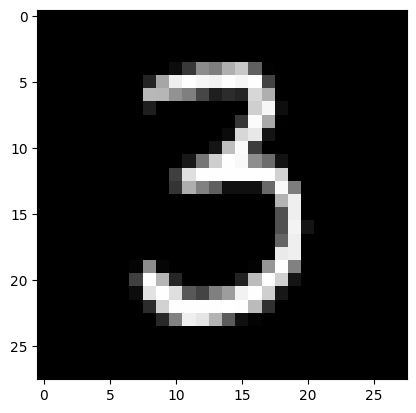

In [48]:
#create an image to plot each image from pixels information
img = fiftyInput.reshape(28,28)
# And displaying the image
plt.imshow(img, cmap="gray")

In [49]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',verbose=True)
#mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=20, alpha=1e-4,solver='adam', verbose=True, random_state=1)

# Train the model
print("Training the MLP model...")
mlp.fit(X_train_scaled, y_train)


Training the MLP model...
Iteration 1, loss = 0.81265285
Iteration 2, loss = 0.34924898
Iteration 3, loss = 0.28822508
Iteration 4, loss = 0.26188062
Iteration 5, loss = 0.24721323
Iteration 6, loss = 0.23600820
Iteration 7, loss = 0.22789699
Iteration 8, loss = 0.22180129
Iteration 9, loss = 0.21637240
Iteration 10, loss = 0.21181834
Iteration 11, loss = 0.20831647
Iteration 12, loss = 0.20469483
Iteration 13, loss = 0.20170110
Iteration 14, loss = 0.19863032
Iteration 15, loss = 0.19662876
Iteration 16, loss = 0.19378558
Iteration 17, loss = 0.19158387
Iteration 18, loss = 0.18926440
Iteration 19, loss = 0.18724685
Iteration 20, loss = 0.18529285
Iteration 21, loss = 0.18331525
Iteration 22, loss = 0.18207733
Iteration 23, loss = 0.17984748
Iteration 24, loss = 0.17889908
Iteration 25, loss = 0.17790374
Iteration 26, loss = 0.17626375
Iteration 27, loss = 0.17488296
Iteration 28, loss = 0.17360900
Iteration 29, loss = 0.17259362
Iteration 30, loss = 0.17129965
Iteration 31, loss = 0.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), verbose=True)

In [51]:
# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

In [52]:
print("Digit representation in position:1\n", X_test[1])
print("True Class, Y value:\n", y_train[1])
print("Predicted Class, Y hat:\n", y_pred[1])

Digit representation in position:1
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  62 128  11
   0   0   0   0  24 253  69   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  45 236 158 116   0   0   0   0  45 252  90   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 153 252
 252 206  25   

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9251

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.92      0.91      1380
           3       0.94      0.90      0.92      1433
           4       0.93      0.92      0.92      1295
           5       0.90      0.89      0.89      1273
           6       0.94      0.95      0.94      1396
           7       0.93      0.93      0.93      1503
           8       0.90      0.90      0.90      1357
           9       0.91      0.91      0.91      1420

    accuracy                           0.93     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.93      0.93      0.92     14000



In [54]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1284    2    9    0    1    6   20    5   13    3]
 [   1 1549    6    5    0   10    5    5   15    4]
 [  10   10 1268   13   13    8   17   14   23    4]
 [   5   16   40 1285    1   34    5   19   17   11]
 [   6    2    8    1 1195    8   10   10    6   49]
 [   8    9   18   30   13 1131   14    4   31   15]
 [   3    6   16    4   13   19 1325    1    9    0]
 [  15   12   21    8   12    9    0 1399    2   25]
 [   8   25   14   15    5   20   13   10 1228   19]
 [   7    9    5   12   38   10    0   36   16 1287]]


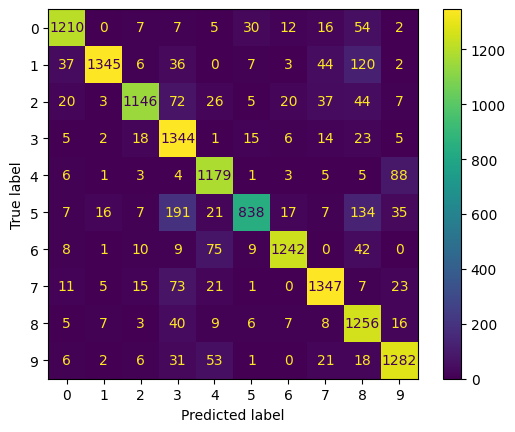

In [55]:
ConfusionMatrixDisplay.from_estimator(mlp,X_test,y_test)